## Finding KBO Makemake in ZTF
This code finds Makemake (136472) in the ZTF database

In [1]:
import mysql.connector
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

This SQL query finds all sightings of Makemake ordered by time

In [2]:
from ztf import settings
msl = mysql.connector.connect(\
            user    =settings.DB_USER, \
            password=settings.DB_PASS, \
            host    =settings.DB_HOST, \
            database='ztf')
cursor = msl.cursor(buffered=True, dictionary=True)
query = 'SELECT jd,ra,decl FROM candidates WHERE ssnamenr="136472" ORDER BY jd'
cursor.execute(query)
n = cursor.rowcount
print ('found %d sightings of Makemake' % n)

found 92 sightings of Makemake


Make the RA/Dec plot

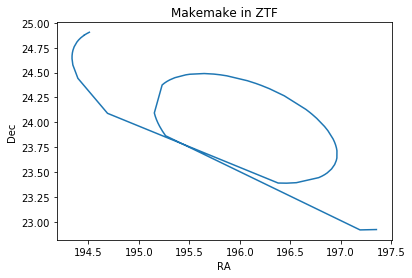

In [3]:
ra = []
de = []
for row in cursor:
    ra.append(row['ra'])
    de.append(row['decl'])
plt.plot(ra, de)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("Makemake in ZTF")
plt.show()